<a href="https://colab.research.google.com/github/Sid-istic/End-to-End-customer-Churn/blob/main/notebook/04_Choosing_model_and_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Choosing best model based on cross validation score**

In [42]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [43]:
churn = pd.read_csv('churn_processed.csv')
churn.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


**Train test split and smoteing as the dataset was imbalanced**

In [44]:
X = churn.drop(['Churn'], axis=1)
y = churn['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train) # after this training data and target will have same no of datapoints

y_train_smote.value_counts()

,count
Churn,
0,4138
1,4138


**Model Training with default parameters**

In [45]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42,max_iter=1000,solver='liblinear') # for logistic we have to set iteration or may go out of bound

}

cv = {} # cross validation scored being saved in a list for each model

for model_name , model in models.items():
    model.fit(X_train_smote, y_train_smote)
    score = cross_val_score(model,X_train_smote, y_train_smote,cv =5 ,scoring = "accuracy")
    print(f"Accuracy of {model_name} is {np.mean(score):.2f}")
    with open(f'{model_name}.pkl', 'wb') as f:
        pickle.dump(model, f)


Accuracy of Decision Tree is 0.78
Accuracy of Random Forest is 0.84
Accuracy of XGBoost is 0.83
Accuracy of Logistic Regression is 0.79


In [46]:
#we will be using random forest as it has highest accuracy
model = RandomForestClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)
y_pred = model.predict(X_test)
print("accuracy score =" , accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


accuracy score = 0.772888573456352
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1036
           1       0.57      0.59      0.58       373

    accuracy                           0.77      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.78      0.77      0.77      1409



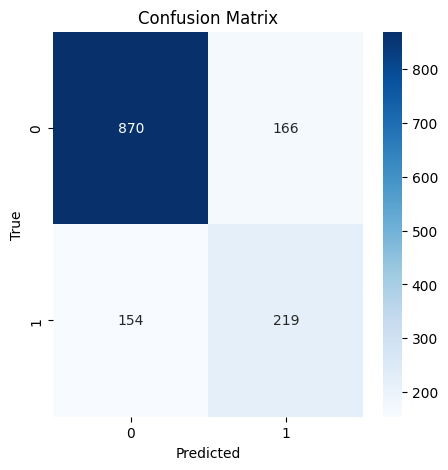

In [49]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()